In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [13]:
random.seed(100)

In [14]:
df = pd.read_csv("C:\\Users\\MSI\\Desktop\\financial_data.csv")

In [15]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [16]:
df.shape

(17908, 21)

In [17]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [18]:
df.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [19]:
df["pay_schedule"].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [20]:
df1 = df.drop(columns = ["entry_id", "pay_schedule", "e_signed"])

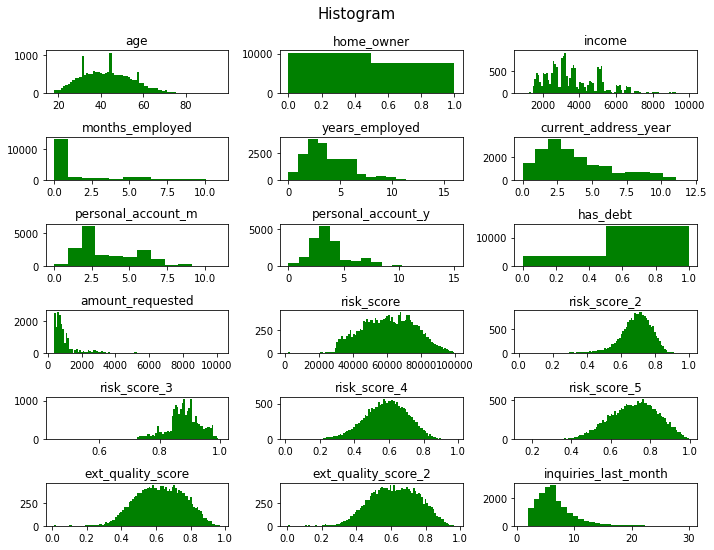

In [21]:
#Visualizing
fig  = plt.figure(figsize = (10,8))
plt.suptitle("Histogram", fontsize = 15)
for i in range(df1.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(df1.columns.values[i])

    vals = np.size(df1.iloc[:,i].unique())
    if vals > 100:
        vals = 100

    plt.hist(df1.iloc[:,i], bins = vals, color = "green")
plt.tight_layout(rect=[0,0.03, 1, 0.95])
plt.show()

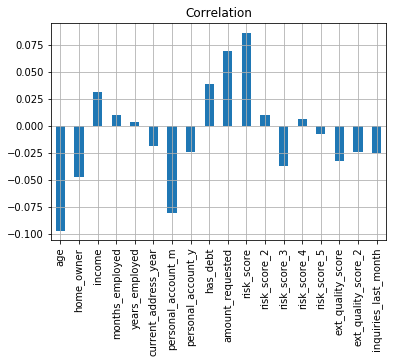

In [23]:
corr = df1.corrwith(df.e_signed).plot.bar(title = "Correlation", fontsize = 10, rot = 90, grid = True)
plt.show()

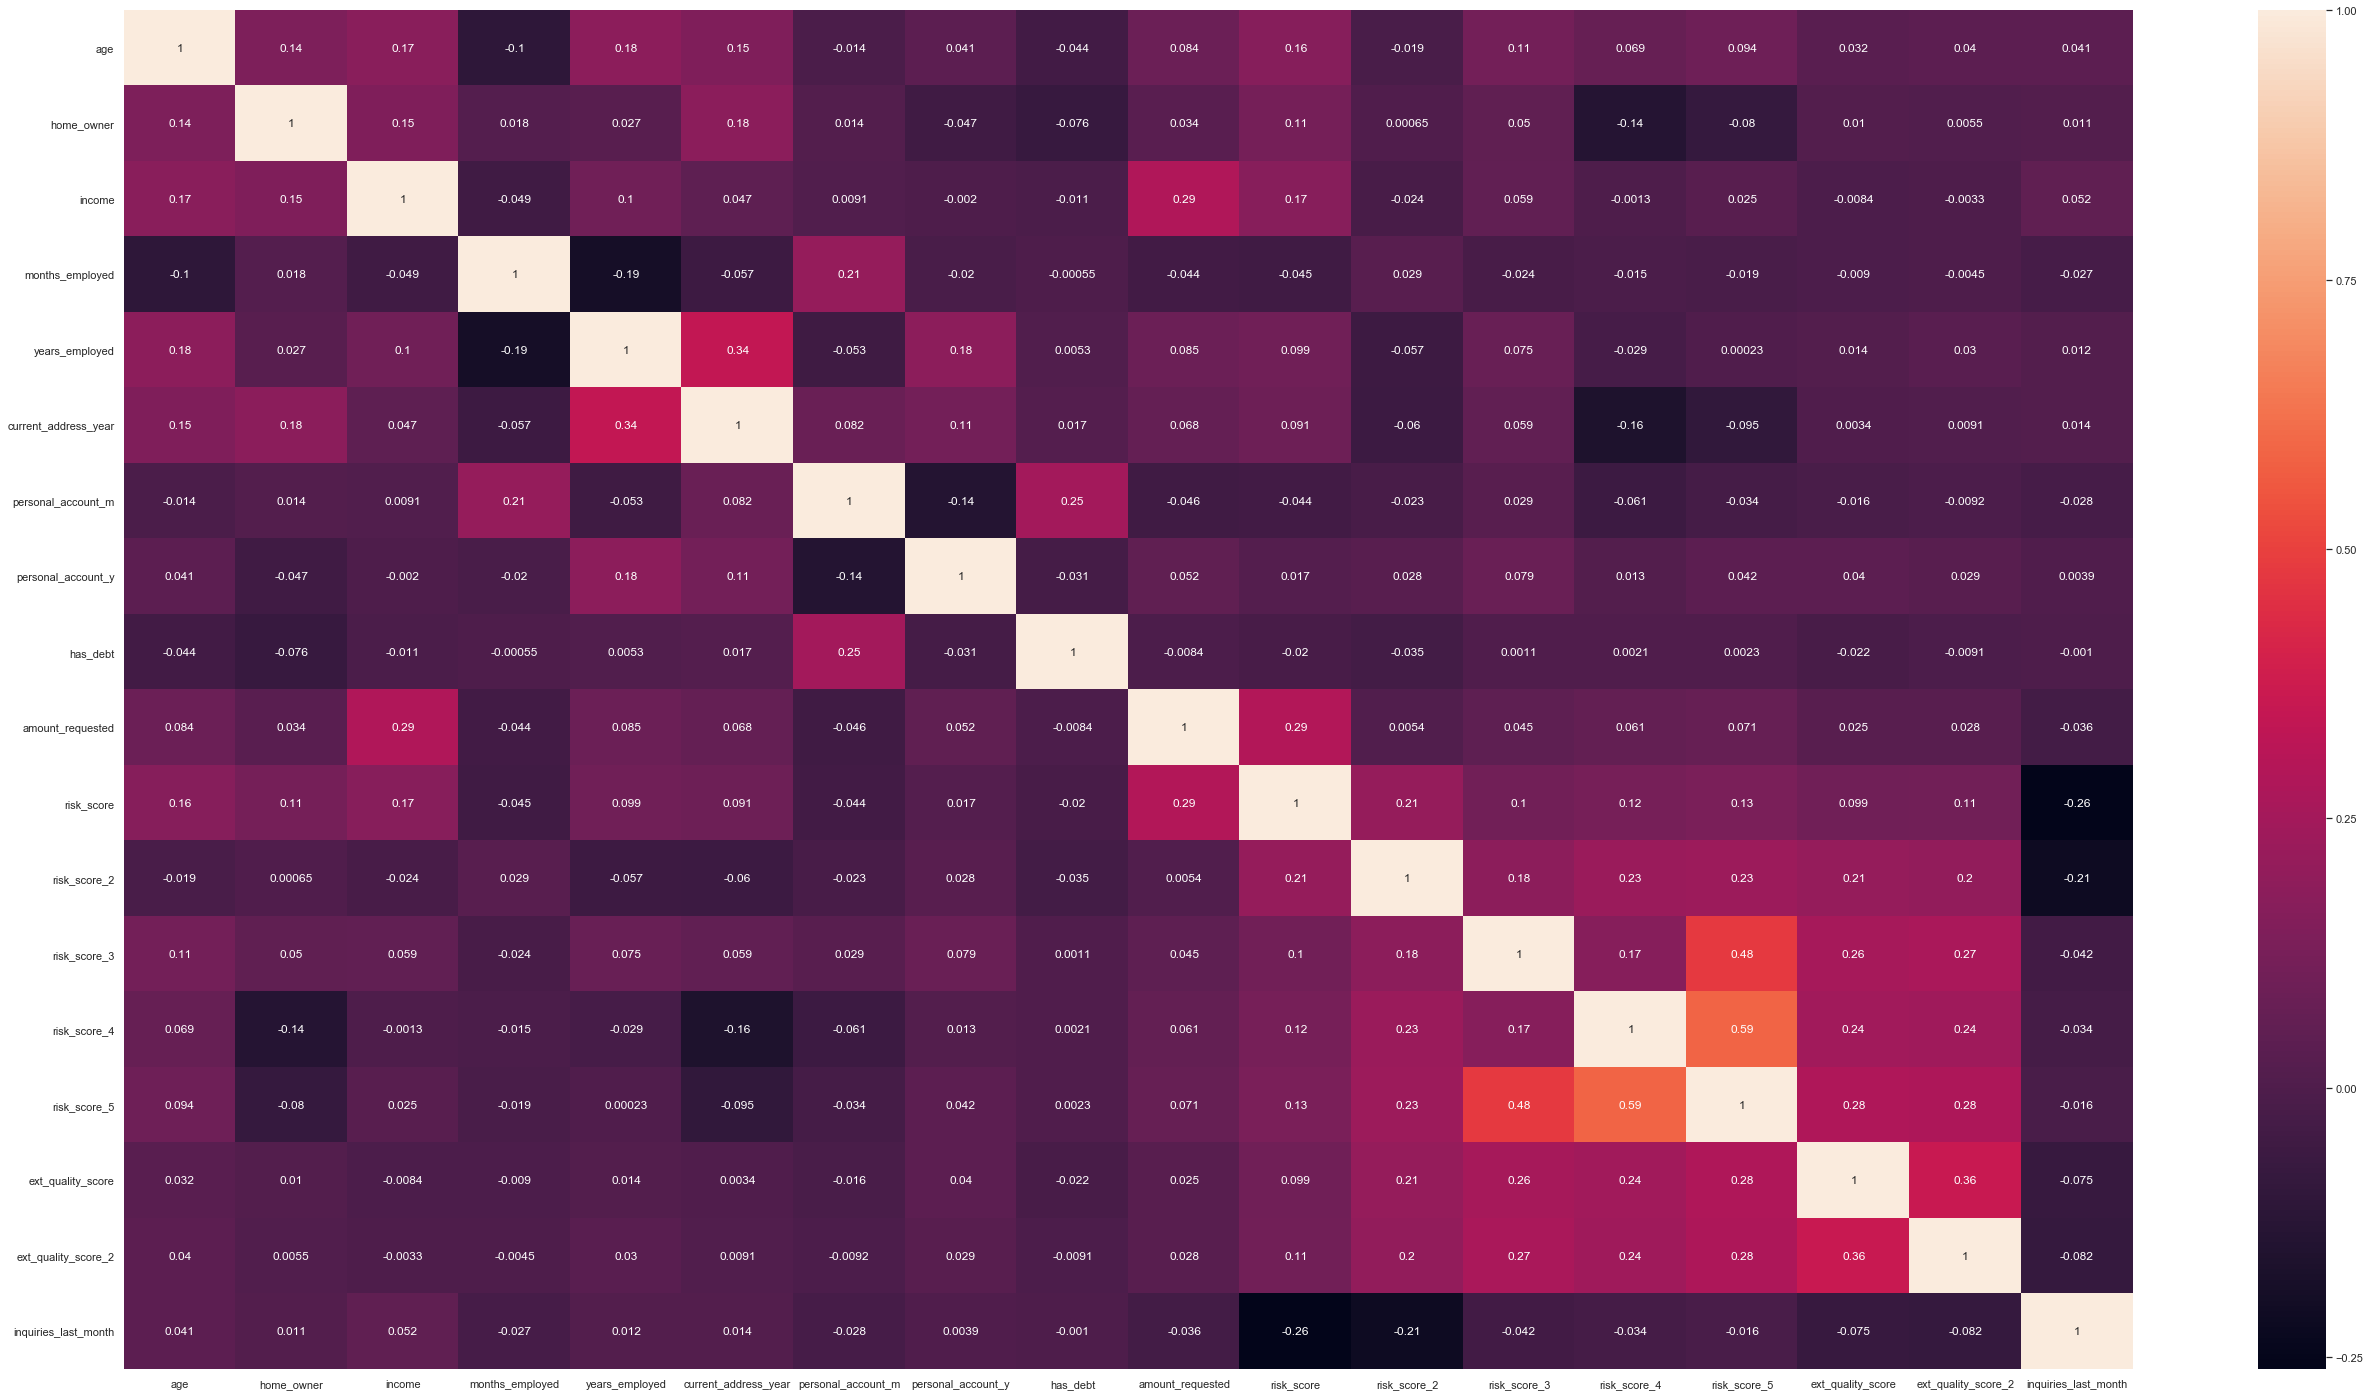

In [30]:
plt.figure(figsize=(45,25))
sn.heatmap(df1.corr(),annot=True)

In [31]:
#Feature Engg.
df2 = df.drop(columns = ["months_employed"])
df2[ "account_months"] = (df.personal_account_m)+(df.personal_account_y*12)
df2 = df2.drop(columns = ["personal_account_m","personal_account_y"])
df2.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [32]:
df2 = pd.get_dummies(df2)
df2.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [33]:
df2 = df2.drop(columns = ["pay_schedule_semi-monthly"])

In [34]:
response = df2["e_signed"]
users = df2["entry_id"]
df2 = df2.drop(columns = ["e_signed", "entry_id"])

In [35]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(df2, response, test_size = 0.3, random_state=0)
sc_x = ss()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))
x_train2.columns = x_train.columns
x_test2.columns = x_test.columns
#print(x_train2)
x_train = x_train2
x_test = x_test2

In [36]:
#Model
#Logistice Regression
LR = LogisticRegression(random_state = 0, penalty = "l1")
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result = pd.DataFrame([["Linear Regression", acc, prec, rec, f1]],
             columns  = ["Model", "Accuracy", "precision", "Recall", "F1 score"])

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
#SVM(linear)
svm = SVC(random_state = 0, kernel = "linear")
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result1 = pd.DataFrame([["SVM(Linear)", acc, prec, rec, f1]],
             columns  = ["Model", "Accuracy", "precision", "Recall", "F1 score"])
 
result = result.append(result1, ignore_index = True)

In [39]:
#SVM(rbf)
svm = SVC(random_state = 0, kernel = "rbf")
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result2 = pd.DataFrame([["SVM(rbf)", acc, prec, rec, f1]],
             columns  = ["Model", "Accuracy", "precision", "Recall", "F1 score"])
 
result = result.append(result2, ignore_index = True)

In [40]:
#Random Forest
RF = RandomForestClassifier(random_state = 0, n_estimators =100, criterion = "entropy")
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

result3 = pd.DataFrame([["Random Forest", acc, prec, rec, f1]],
             columns  = ["Model", "Accuracy", "precision", "Recall", "F1 score"])
 
result = result.append(result3, ignore_index = True)

In [41]:
result

,Model,Accuracy,precision,Recall,F1 score
0,Linear Regression,0.568770,0.579796,0.711211,0.638815
1,SVM(Linear),0.571934,0.579307,0.736550,0.648533
2,SVM(rbf),0.596687,0.608313,0.695939,0.649182
3,Random Forest,0.616415,0.635762,0.666435,0.650737


In [42]:
#k-fold
accuracies = cross_val_score(estimator = RF, X = x_train, y = y_train)
print(accuracies.mean())
print(accuracies.std()*2)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6202634981398322
0.005491288144252413
